# **Questão**
Faça um programa que calcule o Ganho de informação (Information Gain - IG) dado uma partição p em um atributo contínuo. Plote o gráfico do ganho de informação por valor da partição escolhida para o atributo contínuo e indique, no gráfico, qual a melhor partição para aquele atributo.

Importando as Bibliotecas 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Definindo a base de dados

In [ ]:
# Conctando ou drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tem_jogo.csv', encoding='ISO-8859-1')
dataset.head(14)

,Tempo,Temperatura,Umidade,Vento,Joga
0,Chuvoso,71,91,Sim,Não
1,Ensolarado,69,70,Não,Sim
2,Ensolarado,80,90,Sim,Não
3,Nublado,83,86,Não,Sim
4,Chuvoso,70,96,Não,Sim
5,Chuvoso,65,70,Sim,Não
6,Nublado,64,65,Sim,Sim
7,Nublado,72,90,Sim,Sim
8,Ensolarado,75,70,Sim,Sim
9,Chuvoso,68,80,Não,Sim


Função para calcular a entropia

In [ ]:
def entropia(y):
  classes, counts = np.unique(y, return_counts=True)
  p = counts / len(y)
  return -np.sum(p * np.log2(p))

Função para calcular o ganho de informação (IG) para um atributo continuo dado uma partição p

In [ ]:
def Information_Gain_continuous(X, y, p):
  entropia_toral = entropia(y)
  n = len(y) 
  y_esquerda = y[X <= p]
  y_direita = y[X > p]
  n_esquerda = len(y_esquerda)
  n_direita = len(y_direita)
  entropia_esquerda = entropia(y_esquerda)
  entropia_direita = entropia(y_direita)
  ig = entropia_toral - (n_esquerda / n) * entropia_esquerda - (n_direita / n) * entropia_direita
  return ig

Atributo Continuo escolhido: Temperatura

In [ ]:
atributo = 'Temperatura'
X = dataset[atributo].values

Classes de Alvo

In [ ]:
y = dataset['Joga'].values

Calculo do ganho de informação (IG) para cada valor da partição  e escolher do melhor valor

In [ ]:
# definindo o range de valores para a partição
range_p = np.linspace(np.min(X), np.max(X), 100)

ig_max = -np.inf
p_max = None
igs = []
for p in range_p:
  ig = Information_Gain_continuous(X, y, p)
  igs.append(ig)
  if ig > ig_max:
    ig_max = ig
    p_max = p

Plot do grafico do ganho de informação por valor da partição

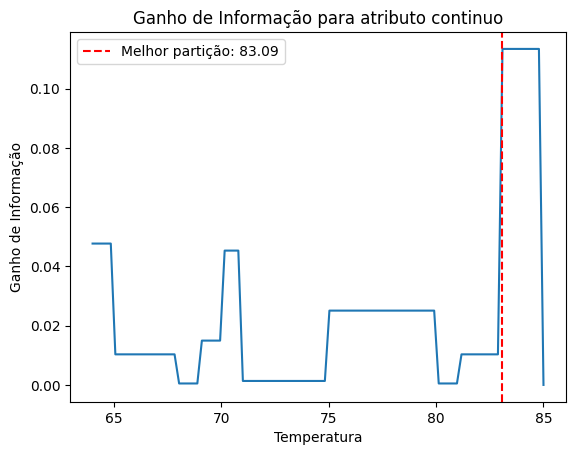

In [ ]:
plt.plot(range_p, igs)
plt.axvline(x=p_max, linestyle='--', color='red', label=f'Melhor partição: {p_max:.2f}')
plt.title('Ganho de Informação para atributo continuo')
plt.xlabel(atributo)
plt.ylabel('Ganho de Informação')
plt.legend()
plt.show()